#**Basic Model**

In [ ]:
from google.colab import drive
drive.mount("/content/drive")
!ls "drive/Shared drives/PMDL Project"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
 CNN.ipynb				     'LSTM with SA.ipynb'
 CNN_With_SA.ipynb			      Models
'Consulting proposal.gslides'		     'Old Notebooks'
'Data Preprocessing.ipynb'		     'Project Wireframes.gslides'
 Datasets				     'Prototyping presentation.gslides'
'Individual Program Brief Template.gslides'  'Spam filter 2.zip'
 LSTM.ipynb				     'Spam Filter.zip'


In [ ]:
import pickle
import keras
from keras.models import Sequential
from keras.layers import Embedding, Conv1D, MaxPooling1D, GlobalMaxPooling1D
from keras.layers import Activation, Dropout, Flatten, Dense
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam

In [ ]:
dataset_dir = "drive/Shared drives/PMDL Project/Datasets"

pickle_off_x_tr = open(dataset_dir + "/train_padded.pickle","rb")
train_padded = pickle.load(pickle_off_x_tr)

pickle_off_y_tr = open(dataset_dir + "/train_labels.pickle","rb")
train_labels = pickle.load(pickle_off_y_tr)

pickle_off_x_test = open(dataset_dir + "/test_padded.pickle","rb")
test_padded = pickle.load(pickle_off_x_test)

pickle_off_y_test = open(dataset_dir + "/test_labels.pickle","rb")
test_labels = pickle.load(pickle_off_y_test)

In [ ]:
print(len(train_padded[0]))

100


In [ ]:
num_total_words = 564273
max_length = 100

In [ ]:
model = Sequential()
model.add(Embedding(num_total_words, max_length, input_length=len(train_padded[0])))

model.add(Conv1D(8, 10, padding = 'valid' , activation = 'relu', strides = 1))
model.add(MaxPooling1D(pool_size=2))
model.add(GlobalMaxPooling1D())

model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.7))
model.add(Dense(1))
model.add(Activation('sigmoid'))


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 100)          56427300  
                                                                 
 conv1d (Conv1D)             (None, 91, 8)             8008      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 45, 8)            0         
 )                                                               
                                                                 
 global_max_pooling1d (Globa  (None, 8)                0         
 lMaxPooling1D)                                                  
                                                                 
 dense (Dense)               (None, 64)                576       
                                                                 
 activation (Activation)     (None, 64)                0

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer='RMSprop',
              metrics=['accuracy'])

In [ ]:
def train_and_vizualize_model(model, epochs_num):
  history = model.fit(
    train_padded, train_labels, batch_size=32, epochs=epochs_num, validation_data=(test_padded, test_labels),
)
  x = range(1,epochs_num + 1)
  plt.plot(x, history.history['loss'], 'r', label='Training Loss')
  plt.plot(x,history.history['val_loss'], 'b', label='Validation Loss')

  plt.xlabel('Epoch')
  plt.legend()
  plt.show()

Epoch 1/30
149/149 [==============================] - 17s 24ms/step - loss: 0.4764 - accuracy: 0.7889 - val_loss: 0.2056 - val_accuracy: 0.9511
Epoch 2/30
149/149 [==============================] - 3s 21ms/step - loss: 0.1118 - accuracy: 0.9711 - val_loss: 0.1016 - val_accuracy: 0.9637
Epoch 3/30
149/149 [==============================] - 3s 20ms/step - loss: 0.0515 - accuracy: 0.9869 - val_loss: 0.0949 - val_accuracy: 0.9671
Epoch 4/30
149/149 [==============================] - 3s 20ms/step - loss: 0.0303 - accuracy: 0.9933 - val_loss: 0.1057 - val_accuracy: 0.9680
Epoch 5/30
149/149 [==============================] - 3s 20ms/step - loss: 0.0208 - accuracy: 0.9947 - val_loss: 0.1142 - val_accuracy: 0.9705
Epoch 6/30
149/149 [==============================] - 3s 20ms/step - loss: 0.0156 - accuracy: 0.9960 - val_loss: 0.1282 - val_accuracy: 0.9722
Epoch 7/30
149/149 [==============================] - 3s 20ms/step - loss: 0.0119 - accuracy: 0.9979 - val_loss: 0.1437 - val_accuracy: 0.967

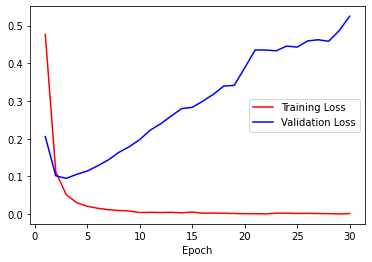

In [ ]:
train_and_vizualize_model(model, 30)

In [ ]:
score = model.evaluate(test_padded, test_labels, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.5245580077171326
Test accuracy: 0.9637436866760254


#**Finding the best Loss Function**

############using  binary_crossentropy  loss function############
Epoch 1/20
149/149 [==============================] - 4s 22ms/step - loss: 0.5572 - accuracy: 0.7100 - val_loss: 0.3762 - val_accuracy: 0.8929
Epoch 2/20
149/149 [==============================] - 3s 20ms/step - loss: 0.1879 - accuracy: 0.9528 - val_loss: 0.1509 - val_accuracy: 0.9452
Epoch 3/20
149/149 [==============================] - 3s 20ms/step - loss: 0.0759 - accuracy: 0.9791 - val_loss: 0.1241 - val_accuracy: 0.9562
Epoch 4/20
149/149 [==============================] - 3s 20ms/step - loss: 0.0465 - accuracy: 0.9882 - val_loss: 0.1268 - val_accuracy: 0.9570
Epoch 5/20
149/149 [==============================] - 3s 20ms/step - loss: 0.0299 - accuracy: 0.9930 - val_loss: 0.1382 - val_accuracy: 0.9612
Epoch 6/20
149/149 [==============================] - 3s 20ms/step - loss: 0.0181 - accuracy: 0.9951 - val_loss: 0.1550 - val_accuracy: 0.9612
Epoch 7/20
149/149 [==============================] - 3s 20ms/step - loss: 0

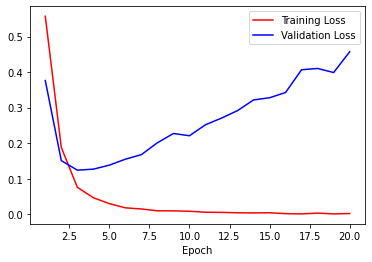

Test score: 0.45719900727272034
Test accuracy: 0.9561551213264465
############using  categorical_crossentropy  loss function############
Epoch 1/20
149/149 [==============================] - 4s 22ms/step - loss: 0.0000e+00 - accuracy: 0.5425 - val_loss: 0.0000e+00 - val_accuracy: 0.4519
Epoch 2/20
149/149 [==============================] - 3s 20ms/step - loss: 0.0000e+00 - accuracy: 0.5421 - val_loss: 0.0000e+00 - val_accuracy: 0.4519
Epoch 3/20
149/149 [==============================] - 3s 20ms/step - loss: 0.0000e+00 - accuracy: 0.5421 - val_loss: 0.0000e+00 - val_accuracy: 0.4519
Epoch 4/20
149/149 [==============================] - 3s 20ms/step - loss: 0.0000e+00 - accuracy: 0.5421 - val_loss: 0.0000e+00 - val_accuracy: 0.4519
Epoch 5/20
149/149 [==============================] - 3s 20ms/step - loss: 0.0000e+00 - accuracy: 0.5421 - val_loss: 0.0000e+00 - val_accuracy: 0.4519
Epoch 6/20
149/149 [==============================] - 3s 20ms/step - loss: 0.0000e+00 - accuracy: 0.5421 - v

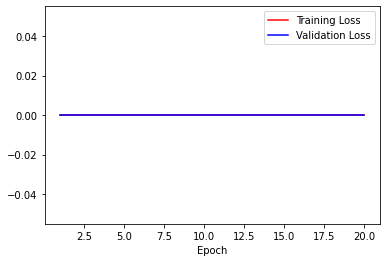

Test score: 0.0
Test accuracy: 0.45193928480148315
############using  poisson  loss function############
Epoch 1/20
149/149 [==============================] - 4s 22ms/step - loss: 0.6947 - accuracy: 0.7686 - val_loss: 0.6361 - val_accuracy: 0.9250
Epoch 2/20
149/149 [==============================] - 3s 20ms/step - loss: 0.5044 - accuracy: 0.9696 - val_loss: 0.5960 - val_accuracy: 0.9528
Epoch 3/20
149/149 [==============================] - 3s 21ms/step - loss: 0.4801 - accuracy: 0.9842 - val_loss: 0.5913 - val_accuracy: 0.9595
Epoch 4/20
149/149 [==============================] - 3s 20ms/step - loss: 0.4691 - accuracy: 0.9924 - val_loss: 0.5909 - val_accuracy: 0.9629
Epoch 5/20
149/149 [==============================] - 3s 20ms/step - loss: 0.4659 - accuracy: 0.9954 - val_loss: 0.6197 - val_accuracy: 0.9578
Epoch 6/20
149/149 [==============================] - 3s 20ms/step - loss: 0.4630 - accuracy: 0.9970 - val_loss: 0.6389 - val_accuracy: 0.9562
Epoch 7/20
149/149 [=================

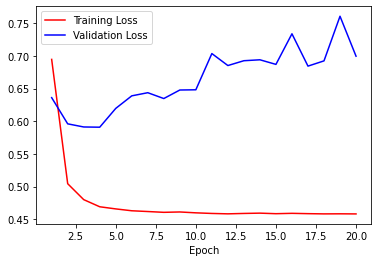

Test score: 0.6995662450790405
Test accuracy: 0.9654300212860107
############using  kl_divergence  loss function############
Epoch 1/20
149/149 [==============================] - 4s 21ms/step - loss: 0.0422 - accuracy: 0.4583 - val_loss: 4.3660e-04 - val_accuracy: 0.5481
Epoch 2/20
149/149 [==============================] - 3s 20ms/step - loss: 2.9948e-04 - accuracy: 0.4579 - val_loss: 8.3870e-06 - val_accuracy: 0.5481
Epoch 3/20
149/149 [==============================] - 3s 20ms/step - loss: 6.4559e-05 - accuracy: 0.4579 - val_loss: 7.3317e-08 - val_accuracy: 0.5481
Epoch 4/20
149/149 [==============================] - 3s 20ms/step - loss: 2.9356e-06 - accuracy: 0.4579 - val_loss: -4.5888e-07 - val_accuracy: 0.5481
Epoch 5/20
149/149 [==============================] - 3s 20ms/step - loss: 7.7136e-06 - accuracy: 0.4579 - val_loss: -6.5858e-07 - val_accuracy: 0.5481
Epoch 6/20
149/149 [==============================] - 3s 20ms/step - loss: 1.2653e-07 - accuracy: 0.4579 - val_loss: -7.02

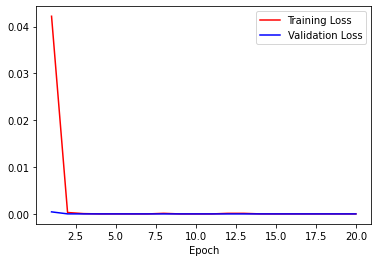

Test score: -7.283396143975551e-07
Test accuracy: 0.5480607151985168
############using  hinge  loss function############
Epoch 1/20
149/149 [==============================] - 4s 22ms/step - loss: 0.9105 - accuracy: 0.7245 - val_loss: 0.6063 - val_accuracy: 0.9368
Epoch 2/20
149/149 [==============================] - 3s 21ms/step - loss: 0.6084 - accuracy: 0.9669 - val_loss: 0.5055 - val_accuracy: 0.9536
Epoch 3/20
149/149 [==============================] - 3s 21ms/step - loss: 0.5695 - accuracy: 0.9804 - val_loss: 0.4957 - val_accuracy: 0.9545
Epoch 4/20
149/149 [==============================] - 3s 21ms/step - loss: 0.5563 - accuracy: 0.9895 - val_loss: 0.4879 - val_accuracy: 0.9688
Epoch 5/20
149/149 [==============================] - 3s 20ms/step - loss: 0.5523 - accuracy: 0.9933 - val_loss: 0.4832 - val_accuracy: 0.9713
Epoch 6/20
149/149 [==============================] - 3s 21ms/step - loss: 0.5490 - accuracy: 0.9941 - val_loss: 0.4833 - val_accuracy: 0.9705
Epoch 7/20
149/149 [=

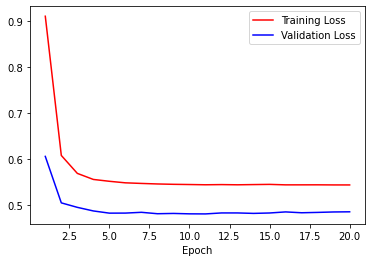

Test score: 0.4860663414001465
Test accuracy: 0.9671163558959961
############using  squared_hinge  loss function############
Epoch 1/20
149/149 [==============================] - 4s 22ms/step - loss: 1.0642 - accuracy: 0.5431 - val_loss: 0.9663 - val_accuracy: 0.4519
Epoch 2/20
149/149 [==============================] - 3s 21ms/step - loss: 0.7816 - accuracy: 0.7370 - val_loss: 0.6405 - val_accuracy: 0.8390
Epoch 3/20
149/149 [==============================] - 3s 21ms/step - loss: 0.6252 - accuracy: 0.9490 - val_loss: 0.5731 - val_accuracy: 0.8980
Epoch 4/20
149/149 [==============================] - 3s 21ms/step - loss: 0.5838 - accuracy: 0.9768 - val_loss: 0.5620 - val_accuracy: 0.8971
Epoch 5/20
149/149 [==============================] - 3s 21ms/step - loss: 0.5682 - accuracy: 0.9863 - val_loss: 0.5621 - val_accuracy: 0.9064
Epoch 6/20
149/149 [==============================] - 3s 21ms/step - loss: 0.5590 - accuracy: 0.9901 - val_loss: 0.5560 - val_accuracy: 0.9174
Epoch 7/20
149/14

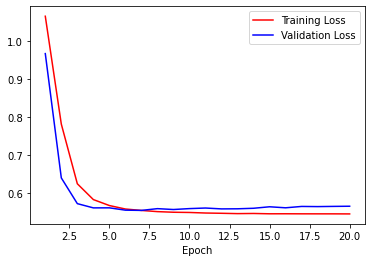

Test score: 0.5663307309150696
Test accuracy: 0.9097808003425598
############using  categorical_hinge  loss function############
Epoch 1/20
149/149 [==============================] - 4s 22ms/step - loss: 0.9027 - accuracy: 0.7165 - val_loss: 0.6123 - val_accuracy: 0.8904
Epoch 2/20
149/149 [==============================] - 3s 21ms/step - loss: 0.6161 - accuracy: 0.9517 - val_loss: 0.5123 - val_accuracy: 0.9460
Epoch 3/20
149/149 [==============================] - 3s 21ms/step - loss: 0.5684 - accuracy: 0.9795 - val_loss: 0.4991 - val_accuracy: 0.9553
Epoch 4/20
149/149 [==============================] - 3s 21ms/step - loss: 0.5565 - accuracy: 0.9882 - val_loss: 0.4973 - val_accuracy: 0.9562
Epoch 5/20
149/149 [==============================] - 3s 21ms/step - loss: 0.5525 - accuracy: 0.9920 - val_loss: 0.4900 - val_accuracy: 0.9629
Epoch 6/20
149/149 [==============================] - 3s 21ms/step - loss: 0.5489 - accuracy: 0.9939 - val_loss: 0.4915 - val_accuracy: 0.9604
Epoch 7/20
14

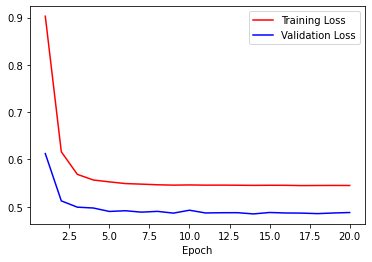

Test score: 0.487713098526001
Test accuracy: 0.9654300212860107


In [ ]:
loss_functions = ["binary_crossentropy", "categorical_crossentropy", "poisson", "kl_divergence", "hinge", "squared_hinge", "categorical_hinge"]
num_of_loss = 7

for i in range(num_of_loss):
  print("############using ", loss_functions[i], " loss function############")
  model = Sequential()
  model.add(Embedding(num_total_words, max_length, input_length=len(train_padded[0])))

  model.add(Conv1D(8, 10, padding = 'valid' , activation = 'relu', strides = 1))
  model.add(MaxPooling1D(pool_size=2))
  model.add(GlobalMaxPooling1D())

  model.add(Dense(64))
  model.add(Activation('relu'))
  model.add(Dropout(0.7))
  model.add(Dense(1))
  model.add(Activation('sigmoid'))
  model.compile(loss=loss_functions[i],
                optimizer='RMSprop',
                metrics=['accuracy'])
  train_and_vizualize_model(model, 20)
  score = model.evaluate(test_padded, test_labels, verbose=0)
  print('Test score:', score[0])
  print('Test accuracy:', score[1])

Therefore, categorial hinge loss is the most suitable loss function

#**Finding the best optimizer**

############using  SGD  Optimizer############
Epoch 1/30
149/149 [==============================] - 2s 9ms/step - loss: 1.0429 - accuracy: 0.4758 - val_loss: 0.9524 - val_accuracy: 0.4536
Epoch 2/30
149/149 [==============================] - 1s 8ms/step - loss: 1.0414 - accuracy: 0.5195 - val_loss: 0.9538 - val_accuracy: 0.4519
Epoch 3/30
149/149 [==============================] - 1s 8ms/step - loss: 1.0402 - accuracy: 0.5433 - val_loss: 0.9550 - val_accuracy: 0.4519
Epoch 4/30
149/149 [==============================] - 1s 7ms/step - loss: 1.0386 - accuracy: 0.5419 - val_loss: 0.9561 - val_accuracy: 0.4519
Epoch 5/30
149/149 [==============================] - 1s 8ms/step - loss: 1.0377 - accuracy: 0.5421 - val_loss: 0.9573 - val_accuracy: 0.4519
Epoch 6/30
149/149 [==============================] - 1s 7ms/step - loss: 1.0367 - accuracy: 0.5421 - val_loss: 0.9584 - val_accuracy: 0.4519
Epoch 7/30
149/149 [==============================] - 1s 8ms/step - loss: 1.0357 - accuracy: 0.5421 - 

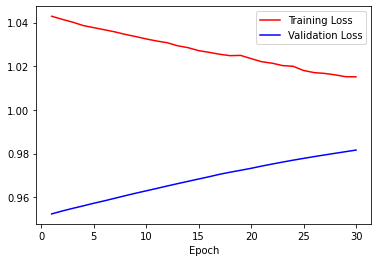

Test score: 0.9816353917121887
Test accuracy: 0.45193928480148315
############using  RMSprop  Optimizer############
Epoch 1/30
149/149 [==============================] - 4s 21ms/step - loss: 0.8917 - accuracy: 0.7511 - val_loss: 0.5936 - val_accuracy: 0.9174
Epoch 2/30
149/149 [==============================] - 3s 19ms/step - loss: 0.6099 - accuracy: 0.9631 - val_loss: 0.5100 - val_accuracy: 0.9545
Epoch 3/30
149/149 [==============================] - 3s 20ms/step - loss: 0.5676 - accuracy: 0.9814 - val_loss: 0.4987 - val_accuracy: 0.9570
Epoch 4/30
149/149 [==============================] - 3s 20ms/step - loss: 0.5574 - accuracy: 0.9884 - val_loss: 0.4916 - val_accuracy: 0.9621
Epoch 5/30
149/149 [==============================] - 3s 19ms/step - loss: 0.5522 - accuracy: 0.9924 - val_loss: 0.4873 - val_accuracy: 0.9654
Epoch 6/30
149/149 [==============================] - 3s 20ms/step - loss: 0.5493 - accuracy: 0.9943 - val_loss: 0.4865 - val_accuracy: 0.9671
Epoch 7/30
149/149 [======

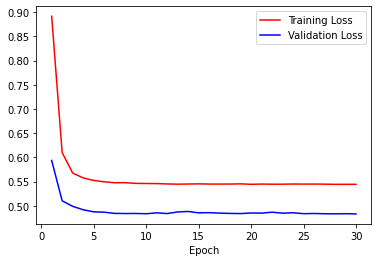

Test score: 0.4829847812652588
Test accuracy: 0.9696458578109741
############using  Adam  Optimizer############
Epoch 1/30
149/149 [==============================] - 10s 59ms/step - loss: 0.9646 - accuracy: 0.7051 - val_loss: 0.5886 - val_accuracy: 0.9216
Epoch 2/30
149/149 [==============================] - 8s 57ms/step - loss: 0.5941 - accuracy: 0.9705 - val_loss: 0.5020 - val_accuracy: 0.9595
Epoch 3/30
149/149 [==============================] - 8s 57ms/step - loss: 0.5570 - accuracy: 0.9907 - val_loss: 0.4927 - val_accuracy: 0.9654
Epoch 4/30
149/149 [==============================] - 8s 57ms/step - loss: 0.5506 - accuracy: 0.9941 - val_loss: 0.4933 - val_accuracy: 0.9629
Epoch 5/30
149/149 [==============================] - 8s 57ms/step - loss: 0.5484 - accuracy: 0.9956 - val_loss: 0.4892 - val_accuracy: 0.9680
Epoch 6/30
149/149 [==============================] - 8s 57ms/step - loss: 0.5472 - accuracy: 0.9962 - val_loss: 0.4951 - val_accuracy: 0.9553
Epoch 7/30
149/149 [=========

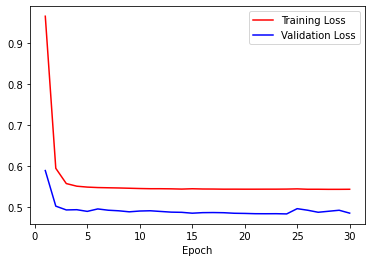

Test score: 0.48489898443222046
Test accuracy: 0.9679595232009888
############using  Adadelta  Optimizer############
Epoch 1/30
149/149 [==============================] - 2s 10ms/step - loss: 1.0433 - accuracy: 0.4740 - val_loss: 0.9510 - val_accuracy: 0.5472
Epoch 2/30
149/149 [==============================] - 1s 9ms/step - loss: 1.0434 - accuracy: 0.4735 - val_loss: 0.9510 - val_accuracy: 0.5481
Epoch 3/30
149/149 [==============================] - 1s 9ms/step - loss: 1.0434 - accuracy: 0.4765 - val_loss: 0.9510 - val_accuracy: 0.5472
Epoch 4/30
149/149 [==============================] - 1s 9ms/step - loss: 1.0439 - accuracy: 0.4617 - val_loss: 0.9510 - val_accuracy: 0.5464
Epoch 5/30
149/149 [==============================] - 1s 9ms/step - loss: 1.0437 - accuracy: 0.4664 - val_loss: 0.9510 - val_accuracy: 0.5438
Epoch 6/30
149/149 [==============================] - 1s 9ms/step - loss: 1.0435 - accuracy: 0.4729 - val_loss: 0.9510 - val_accuracy: 0.5438
Epoch 7/30
149/149 [==========

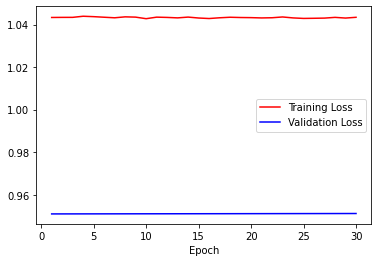

Test score: 0.9511598348617554
Test accuracy: 0.5193929076194763
############using  Adagrad  Optimizer############
Epoch 1/30
149/149 [==============================] - 2s 10ms/step - loss: 1.0413 - accuracy: 0.5117 - val_loss: 0.9524 - val_accuracy: 0.4536
Epoch 2/30
149/149 [==============================] - 1s 9ms/step - loss: 1.0412 - accuracy: 0.5185 - val_loss: 0.9527 - val_accuracy: 0.4519
Epoch 3/30
149/149 [==============================] - 1s 9ms/step - loss: 1.0410 - accuracy: 0.5208 - val_loss: 0.9530 - val_accuracy: 0.4519
Epoch 4/30
149/149 [==============================] - 1s 9ms/step - loss: 1.0403 - accuracy: 0.5284 - val_loss: 0.9532 - val_accuracy: 0.4519
Epoch 5/30
149/149 [==============================] - 1s 10ms/step - loss: 1.0402 - accuracy: 0.5273 - val_loss: 0.9535 - val_accuracy: 0.4519
Epoch 6/30
149/149 [==============================] - 1s 9ms/step - loss: 1.0400 - accuracy: 0.5322 - val_loss: 0.9537 - val_accuracy: 0.4519
Epoch 7/30
149/149 [===========

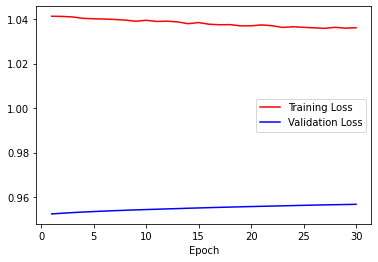

Test score: 0.9567164182662964
Test accuracy: 0.45193928480148315
############using  Adamax  Optimizer############
Epoch 1/30
149/149 [==============================] - 2s 11ms/step - loss: 1.0260 - accuracy: 0.5457 - val_loss: 0.9325 - val_accuracy: 0.4519
Epoch 2/30
149/149 [==============================] - 1s 10ms/step - loss: 0.9193 - accuracy: 0.6395 - val_loss: 0.8081 - val_accuracy: 0.7428
Epoch 3/30
149/149 [==============================] - 2s 10ms/step - loss: 0.7787 - accuracy: 0.8635 - val_loss: 0.6639 - val_accuracy: 0.8491
Epoch 4/30
149/149 [==============================] - 1s 10ms/step - loss: 0.6932 - accuracy: 0.9089 - val_loss: 0.6093 - val_accuracy: 0.8803
Epoch 5/30
149/149 [==============================] - 2s 10ms/step - loss: 0.6490 - accuracy: 0.9338 - val_loss: 0.5767 - val_accuracy: 0.8980
Epoch 6/30
149/149 [==============================] - 1s 10ms/step - loss: 0.6240 - accuracy: 0.9504 - val_loss: 0.5589 - val_accuracy: 0.9098
Epoch 7/30
149/149 [=======

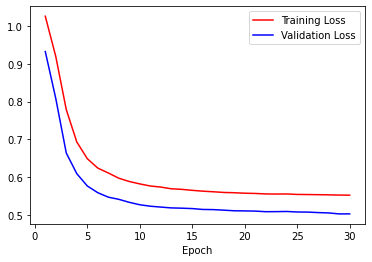

Test score: 0.5028013586997986
Test accuracy: 0.9536256194114685
############using  Nadam  Optimizer############
Epoch 1/30
149/149 [==============================] - 7s 36ms/step - loss: 0.8647 - accuracy: 0.7705 - val_loss: 0.5405 - val_accuracy: 0.9435
Epoch 2/30
149/149 [==============================] - 5s 34ms/step - loss: 0.5862 - accuracy: 0.9713 - val_loss: 0.5071 - val_accuracy: 0.9511
Epoch 3/30
149/149 [==============================] - 5s 33ms/step - loss: 0.5593 - accuracy: 0.9876 - val_loss: 0.4988 - val_accuracy: 0.9570
Epoch 4/30
149/149 [==============================] - 5s 34ms/step - loss: 0.5523 - accuracy: 0.9926 - val_loss: 0.4975 - val_accuracy: 0.9604
Epoch 5/30
149/149 [==============================] - 5s 33ms/step - loss: 0.5495 - accuracy: 0.9951 - val_loss: 0.4931 - val_accuracy: 0.9612
Epoch 6/30
149/149 [==============================] - 5s 34ms/step - loss: 0.5480 - accuracy: 0.9958 - val_loss: 0.4926 - val_accuracy: 0.9612
Epoch 7/30
149/149 [=========

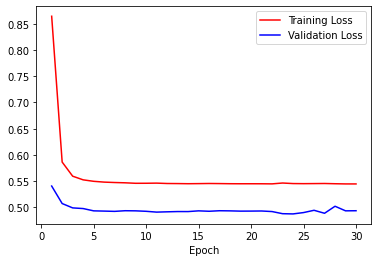

Test score: 0.49333125352859497
Test accuracy: 0.9578414559364319
############using  Ftrl  Optimizer############
Epoch 1/30
149/149 [==============================] - 2s 10ms/step - loss: 1.0420 - accuracy: 0.5419 - val_loss: 0.9521 - val_accuracy: 0.4519
Epoch 2/30
149/149 [==============================] - 1s 10ms/step - loss: 1.0419 - accuracy: 0.5421 - val_loss: 0.9522 - val_accuracy: 0.4519
Epoch 3/30
149/149 [==============================] - 1s 9ms/step - loss: 1.0418 - accuracy: 0.5421 - val_loss: 0.9522 - val_accuracy: 0.4519
Epoch 4/30
149/149 [==============================] - 1s 10ms/step - loss: 1.0418 - accuracy: 0.5421 - val_loss: 0.9523 - val_accuracy: 0.4519
Epoch 5/30
149/149 [==============================] - 1s 10ms/step - loss: 1.0417 - accuracy: 0.5421 - val_loss: 0.9524 - val_accuracy: 0.4519
Epoch 6/30
149/149 [==============================] - 1s 9ms/step - loss: 1.0417 - accuracy: 0.5421 - val_loss: 0.9524 - val_accuracy: 0.4519
Epoch 7/30
149/149 [===========

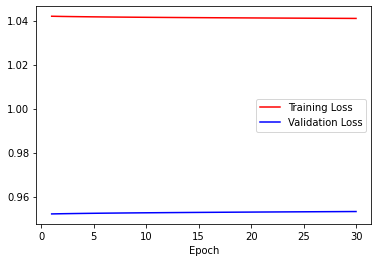

Test score: 0.9531670808792114
Test accuracy: 0.45193928480148315


In [ ]:
optimizers = ["SGD", "RMSprop", "Adam", "Adadelta", "Adagrad", "Adamax", "Nadam", "Ftrl"]
num_of_optimizers = 8

for i in range(num_of_optimizers):
  print("############using ", optimizers[i], " Optimizer############")
  model = Sequential()
  model.add(Embedding(num_total_words, max_length, input_length=len(train_padded[0])))

  model.add(Conv1D(8, 10, padding = 'valid' , activation = 'relu', strides = 1))
  model.add(MaxPooling1D(pool_size=2))
  model.add(GlobalMaxPooling1D())

  model.add(Dense(64))
  model.add(Activation('relu'))
  model.add(Dropout(0.7))
  model.add(Dense(1))
  model.add(Activation('sigmoid'))

  model.compile(loss='categorical_hinge',
                optimizer= optimizers[i],
                metrics=['accuracy'])
  
  train_and_vizualize_model(model, 30)
  score = model.evaluate(test_padded, test_labels, verbose=0)
  
  print('Test score:', score[0])
  print('Test accuracy:', score[1])


Therefore, Adamax is the best optimizer

#**Optimizing Embedding Depth**

############using  4  embeding depth############
Epoch 1/30
149/149 [==============================] - 9s 6ms/step - loss: 1.0398 - accuracy: 0.5320 - val_loss: 0.9550 - val_accuracy: 0.4519
Epoch 2/30
149/149 [==============================] - 1s 5ms/step - loss: 1.0325 - accuracy: 0.5417 - val_loss: 0.9536 - val_accuracy: 0.4519
Epoch 3/30
149/149 [==============================] - 1s 4ms/step - loss: 1.0137 - accuracy: 0.5421 - val_loss: 0.9403 - val_accuracy: 0.4519
Epoch 4/30
149/149 [==============================] - 1s 5ms/step - loss: 0.9697 - accuracy: 0.5429 - val_loss: 0.8993 - val_accuracy: 0.4519
Epoch 5/30
149/149 [==============================] - 1s 5ms/step - loss: 0.9013 - accuracy: 0.6359 - val_loss: 0.8231 - val_accuracy: 0.6686
Epoch 6/30
149/149 [==============================] - 1s 5ms/step - loss: 0.8216 - accuracy: 0.8515 - val_loss: 0.7380 - val_accuracy: 0.8617
Epoch 7/30
149/149 [==============================] - 1s 4ms/step - loss: 0.7510 - accuracy: 0.9158

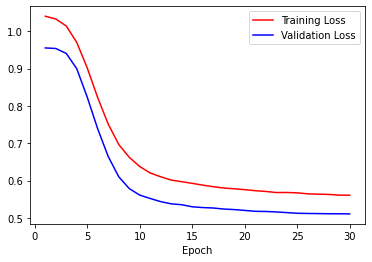

Test score: 0.5110064148902893
Test accuracy: 0.9468802809715271
############using  8  embeding depth############
Epoch 1/30
149/149 [==============================] - 1s 5ms/step - loss: 1.0397 - accuracy: 0.5279 - val_loss: 0.9548 - val_accuracy: 0.4519
Epoch 2/30
149/149 [==============================] - 1s 5ms/step - loss: 1.0327 - accuracy: 0.5412 - val_loss: 0.9527 - val_accuracy: 0.4519
Epoch 3/30
149/149 [==============================] - 1s 5ms/step - loss: 1.0106 - accuracy: 0.5423 - val_loss: 0.9338 - val_accuracy: 0.4519
Epoch 4/30
149/149 [==============================] - 1s 4ms/step - loss: 0.9583 - accuracy: 0.5520 - val_loss: 0.8780 - val_accuracy: 0.4519
Epoch 5/30
149/149 [==============================] - 1s 5ms/step - loss: 0.8829 - accuracy: 0.7096 - val_loss: 0.7981 - val_accuracy: 0.7664
Epoch 6/30
149/149 [==============================] - 1s 5ms/step - loss: 0.8108 - accuracy: 0.8796 - val_loss: 0.7316 - val_accuracy: 0.8524
Epoch 7/30
149/149 [==============

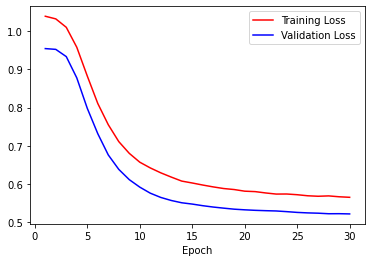

Test score: 0.520999550819397
Test accuracy: 0.9359190464019775
############using  16  embeding depth############
Epoch 1/30
149/149 [==============================] - 1s 6ms/step - loss: 1.0381 - accuracy: 0.5377 - val_loss: 0.9521 - val_accuracy: 0.4519
Epoch 2/30
149/149 [==============================] - 1s 4ms/step - loss: 1.0218 - accuracy: 0.5543 - val_loss: 0.9355 - val_accuracy: 0.4519
Epoch 3/30
149/149 [==============================] - 1s 4ms/step - loss: 0.9641 - accuracy: 0.6421 - val_loss: 0.8626 - val_accuracy: 0.6788
Epoch 4/30
149/149 [==============================] - 1s 5ms/step - loss: 0.8485 - accuracy: 0.8135 - val_loss: 0.7243 - val_accuracy: 0.8449
Epoch 5/30
149/149 [==============================] - 1s 5ms/step - loss: 0.7418 - accuracy: 0.8829 - val_loss: 0.6317 - val_accuracy: 0.8870
Epoch 6/30
149/149 [==============================] - 1s 5ms/step - loss: 0.6814 - accuracy: 0.9213 - val_loss: 0.5854 - val_accuracy: 0.9064
Epoch 7/30
149/149 [==============

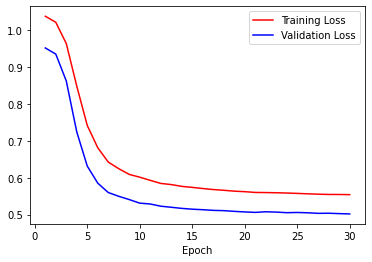

Test score: 0.5020143389701843
Test accuracy: 0.9527824521064758
############using  32  embeding depth############
Epoch 1/30
149/149 [==============================] - 1s 6ms/step - loss: 1.0386 - accuracy: 0.5330 - val_loss: 0.9527 - val_accuracy: 0.4519
Epoch 2/30
149/149 [==============================] - 1s 5ms/step - loss: 1.0204 - accuracy: 0.5522 - val_loss: 0.9316 - val_accuracy: 0.4519
Epoch 3/30
149/149 [==============================] - 1s 5ms/step - loss: 0.9454 - accuracy: 0.6193 - val_loss: 0.8399 - val_accuracy: 0.6796
Epoch 4/30
149/149 [==============================] - 1s 5ms/step - loss: 0.8180 - accuracy: 0.8095 - val_loss: 0.6890 - val_accuracy: 0.8567
Epoch 5/30
149/149 [==============================] - 1s 5ms/step - loss: 0.7229 - accuracy: 0.8884 - val_loss: 0.6178 - val_accuracy: 0.8887
Epoch 6/30
149/149 [==============================] - 1s 5ms/step - loss: 0.6728 - accuracy: 0.9201 - val_loss: 0.5857 - val_accuracy: 0.8988
Epoch 7/30
149/149 [=============

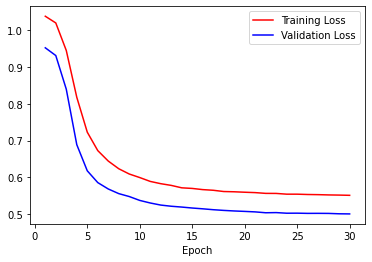

Test score: 0.5003796219825745
Test accuracy: 0.9536256194114685
############using  64  embeding depth############
Epoch 1/30
149/149 [==============================] - 1s 6ms/step - loss: 1.0398 - accuracy: 0.5469 - val_loss: 0.9502 - val_accuracy: 0.4536
Epoch 2/30
149/149 [==============================] - 1s 5ms/step - loss: 1.0143 - accuracy: 0.6712 - val_loss: 0.9063 - val_accuracy: 0.6847
Epoch 3/30
149/149 [==============================] - 1s 5ms/step - loss: 0.8857 - accuracy: 0.8593 - val_loss: 0.7113 - val_accuracy: 0.8988
Epoch 4/30
149/149 [==============================] - 1s 5ms/step - loss: 0.7072 - accuracy: 0.9344 - val_loss: 0.5853 - val_accuracy: 0.9292
Epoch 5/30
149/149 [==============================] - 1s 5ms/step - loss: 0.6377 - accuracy: 0.9540 - val_loss: 0.5483 - val_accuracy: 0.9334
Epoch 6/30
149/149 [==============================] - 1s 5ms/step - loss: 0.6061 - accuracy: 0.9684 - val_loss: 0.5329 - val_accuracy: 0.9368
Epoch 7/30
149/149 [=============

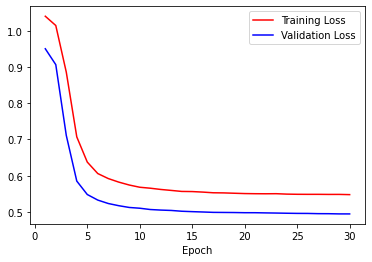

Test score: 0.49475550651550293
Test accuracy: 0.9586846828460693
############using  128  embeding depth############
Epoch 1/30
149/149 [==============================] - 1s 6ms/step - loss: 1.0321 - accuracy: 0.5419 - val_loss: 0.9380 - val_accuracy: 0.4519
Epoch 2/30
149/149 [==============================] - 1s 5ms/step - loss: 0.9369 - accuracy: 0.6404 - val_loss: 0.8050 - val_accuracy: 0.7344
Epoch 3/30
149/149 [==============================] - 1s 5ms/step - loss: 0.7617 - accuracy: 0.8916 - val_loss: 0.6246 - val_accuracy: 0.9089
Epoch 4/30
149/149 [==============================] - 1s 5ms/step - loss: 0.6554 - accuracy: 0.9468 - val_loss: 0.5593 - val_accuracy: 0.9266
Epoch 5/30
149/149 [==============================] - 1s 5ms/step - loss: 0.6142 - accuracy: 0.9608 - val_loss: 0.5363 - val_accuracy: 0.9359
Epoch 6/30
149/149 [==============================] - 1s 5ms/step - loss: 0.5968 - accuracy: 0.9713 - val_loss: 0.5268 - val_accuracy: 0.9376
Epoch 7/30
149/149 [===========

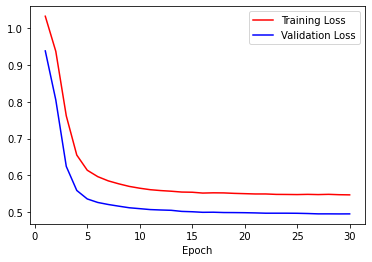

Test score: 0.49576911330223083
Test accuracy: 0.9586846828460693


In [ ]:
n = 4
while n < 130:
  print("############using ", n, " embeding depth############")
  model = Sequential()
  model.add(Embedding(num_total_words, n, input_length=len(train_padded[0])))

  model.add(Conv1D(8, 10, padding = 'valid' , activation = 'relu', strides = 1))
  model.add(MaxPooling1D(pool_size=2))
  model.add(GlobalMaxPooling1D())

  model.add(Dense(64))
  model.add(Activation('relu'))
  model.add(Dropout(0.7))
  model.add(Dense(1))
  model.add(Activation('sigmoid'))

  model.compile(loss='categorical_hinge',
                optimizer= 'Adamax',
                metrics=['accuracy'])
  
  train_and_vizualize_model(model, 30)
  score = model.evaluate(test_padded, test_labels, verbose=0)
  
  print('Test score:', score[0])
  print('Test accuracy:', score[1])

  n = n*2

Best number of Embedding layers is 64

# **Final Model**

Epoch 1/25
149/149 [==============================] - 1s 5ms/step - loss: 1.0385 - accuracy: 0.5412 - val_loss: 0.9434 - val_accuracy: 0.7361
Epoch 2/25
149/149 [==============================] - 1s 5ms/step - loss: 0.9886 - accuracy: 0.7922 - val_loss: 0.8371 - val_accuracy: 0.8929
Epoch 3/25
149/149 [==============================] - 1s 5ms/step - loss: 0.7857 - accuracy: 0.9131 - val_loss: 0.6130 - val_accuracy: 0.9266
Epoch 4/25
149/149 [==============================] - 1s 5ms/step - loss: 0.6505 - accuracy: 0.9517 - val_loss: 0.5443 - val_accuracy: 0.9452
Epoch 5/25
149/149 [==============================] - 1s 5ms/step - loss: 0.6071 - accuracy: 0.9667 - val_loss: 0.5242 - val_accuracy: 0.9503
Epoch 6/25
149/149 [==============================] - 1s 5ms/step - loss: 0.5880 - accuracy: 0.9757 - val_loss: 0.5136 - val_accuracy: 0.9528
Epoch 7/25
149/149 [==============================] - 1s 5ms/step - loss: 0.5782 - accuracy: 0.9785 - val_loss: 0.5104 - val_accuracy: 0.9519
Epoch 

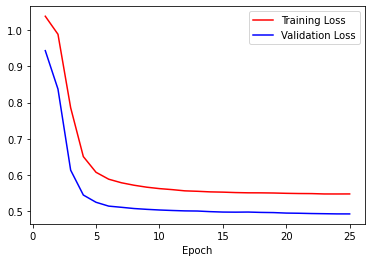

Test score: 0.4920703172683716
Test accuracy: 0.9629005193710327


In [ ]:
model = Sequential()
model.add(Embedding(num_total_words, 128, input_length=len(train_padded[0])))

model.add(Conv1D(8, 10, padding = 'valid' , activation = 'relu', strides = 1))
model.add(MaxPooling1D(pool_size=2))
model.add(GlobalMaxPooling1D())

model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.7))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='categorical_hinge',
              optimizer= 'Adamax',
              metrics=['accuracy'])

train_and_vizualize_model(model, 25)
score = model.evaluate(test_padded, test_labels, verbose=0)

print('Test score:', score[0])
print('Test accuracy:', score[1])

In [ ]:
models_dir = "drive/Shared drives/PMDL Project/Models"
pickle_cnn = open(models_dir + "/CNN.pickle","wb")
pickle.dump(model, pickle_cnn)
pickle_cnn.close()

INFO:tensorflow:Assets written to: ram://1eecd0fc-083b-4073-9d02-9e9dd438599e/assets
